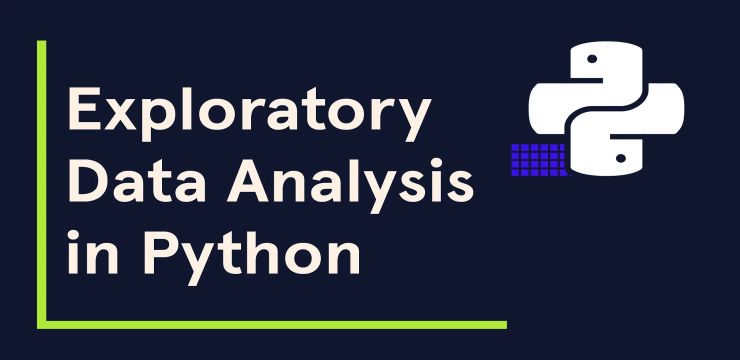

# **Exploratory Data Analysis and Machine Learning with Python**

#### Exploratory Data Analysis (EDA) is a method used to summarize and understand the main characteristics of a dataset, often using statistical graphics and data visualization, to uncover patterns, anomalies, and relationships before applying more advanced analysis techniques.

# **Objective :**

Leverage this comprehensive CPU and GPU dataset to perform Exploratory Data Analysis (EDA) and develop predictive Machine Learning models. Uncover trends in performance, pricing, and power efficiency across architectures and manufacturers. Enable the team to identify optimal hardware configurations, forecast market trends, and provide actionable insights for tech enthusiasts, developers, and industry stakeholders using statistical analysis and advanced algorithms.

In [103]:
#Step 1: Import Libraries
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVR
from scipy.stats import norm
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from matplotlib.colors import LinearSegmentedColormap
from sklearn.feature_selection import SelectKBest, f_classif ,f_regression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

### **Step 2: Load the Data**

In [104]:
file_path = '/content/CPU_GPU_DATASET (1).csv'
df= pd.read_csv(file_path)
print(df.head())

                   Name Type Manufacturer Architecture  Core Count  \
0   Intel Core i5-9600K  CPU        Intel  Coffee Lake           6   
1     AMD Ryzen 7 3700X  CPU          AMD        Zen 2           8   
2  Intel Core i3-10100F  CPU        Intel   Comet Lake           4   
3     AMD Ryzen 5 5600X  CPU          AMD        Zen 3           6   
4  Intel Core i7-11700K  CPU        Intel  Rocket Lake           8   

   Base Clock Speed  Max Clock Speed    Memory  Process Node  TDP  \
0               3.7              4.6   9 MB L3            14   95   
1               3.6              4.4  36 MB L3             7   65   
2               3.6              4.3   6 MB L3            14   65   
3               3.7              4.6  32 MB L3             7   65   
4               3.6              5.0  16 MB L3            14  125   

   Power Efficiency Release Date  Price USD  Price INR  Ratings  
0                83   01/08/2019      262.0      20960      8.3  
1                89   07/07/2019

### **Step 3: Convert to DataFrame**

In [105]:
df = pd.read_csv('/content/CPU_GPU_DATASET (1).csv')
df.head()

,Name,Type,Manufacturer,Architecture,Core Count,Base Clock Speed,Max Clock Speed,Memory,Process Node,TDP,Power Efficiency,Release Date,Price USD,Price INR,Ratings
0,Intel Core i5-9600K,CPU,Intel,Coffee Lake,6,3.7,4.6,9 MB L3,14,95,83,01/08/2019,262.0,20960,8.3
1,AMD Ryzen 7 3700X,CPU,AMD,Zen 2,8,3.6,4.4,36 MB L3,7,65,89,07/07/2019,329.0,26320,8.8
2,Intel Core i3-10100F,CPU,Intel,Comet Lake,4,3.6,4.3,6 MB L3,14,65,82,10/20/2020,122.0,9760,8.1
3,AMD Ryzen 5 5600X,CPU,AMD,Zen 3,6,3.7,4.6,32 MB L3,7,65,91,11/05/2020,299.0,23920,9.1
4,Intel Core i7-11700K,CPU,Intel,Rocket Lake,8,3.6,5.0,16 MB L3,14,125,85,03/16/2021,399.0,31920,8.7


### **Step 4: Basic Info about the DataFrame**

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5500 entries, 0 to 5499
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              5500 non-null   object 
 1   Type              5500 non-null   object 
 2   Manufacturer      5500 non-null   object 
 3   Architecture      5500 non-null   object 
 4   Core Count        5500 non-null   int64  
 5   Base Clock Speed  5500 non-null   float64
 6   Max Clock Speed   5500 non-null   float64
 7   Memory            5500 non-null   object 
 8   Process Node      5500 non-null   int64  
 9   TDP               5500 non-null   int64  
 10  Power Efficiency  5500 non-null   int64  
 11  Release Date      5500 non-null   object 
 12  Price USD         5499 non-null   float64
 13  Price INR         5500 non-null   int64  
 14  Ratings           5500 non-null   float64
dtypes: float64(4), int64(5), object(6)
memory usage: 644.7+ KB


In [107]:
df.shape

(5500, 15)

### **Step 5: Explore Dataset Dimensions**

In [108]:
print("Shape of the dataset (rows, columns):", df.shape)
print("Columns in the dataset:", df.columns.tolist())

Shape of the dataset (rows, columns): (5500, 15)
Columns in the dataset: ['Name', 'Type', 'Manufacturer', 'Architecture', 'Core Count', 'Base Clock Speed', 'Max Clock Speed', 'Memory', 'Process Node', 'TDP', 'Power Efficiency', 'Release Date', 'Price USD', 'Price INR', 'Ratings']


### **Step 6: Describe the Dataset**

In [109]:
df.describe()

,Core Count,Base Clock Speed,Max Clock Speed,Process Node,TDP,Power Efficiency,Price USD,Price INR,Ratings
count,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5499.000000,5500.000000,5500.000000
mean,3964.196364,2.720324,3.380058,6.526545,210.832000,89.946909,766.239680,61293.541818,8.519036
std,5973.212690,1.016151,1.270285,3.940850,134.403897,5.965264,525.125627,42008.307119,0.849010
min,2.000000,1.150000,1.420000,2.000000,15.000000,80.000000,97.000000,7760.000000,7.000000
25%,12.000000,1.850000,2.250000,3.000000,102.000000,85.000000,367.000000,29360.000000,7.800000
50%,400.000000,2.490000,3.010000,5.000000,163.000000,90.000000,587.000000,46960.000000,8.600000
75%,6144.000000,3.572500,4.500000,10.000000,320.000000,95.000000,1139.500000,91140.000000,9.200000
max,21504.000000,4.700000,6.150000,14.000000,500.000000,100.000000,2000.000000,160000.000000,10.000000


In [110]:
df.describe(include='all')

,Name,Type,Manufacturer,Architecture,Core Count,Base Clock Speed,Max Clock Speed,Memory,Process Node,TDP,Power Efficiency,Release Date,Price USD,Price INR,Ratings
count,5500,5500,5500,5500,5500.000000,5500.000000,5500.000000,5500,5500.000000,5500.000000,5500.000000,5500,5499.000000,5500.000000,5500.000000
unique,5384,2,3,24,NaN,NaN,NaN,45,NaN,NaN,NaN,2234,NaN,NaN,NaN
top,AMD Radeon RX 7600,CPU,AMD,RDNA,NaN,NaN,NaN,32 MB L3,NaN,NaN,NaN,01/04/2022,NaN,NaN,NaN
freq,2,2750,2726,379,NaN,NaN,NaN,706,NaN,NaN,NaN,14,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,3964.196364,2.720324,3.380058,NaN,6.526545,210.832000,89.946909,NaN,766.239680,61293.541818,8.519036
std,NaN,NaN,NaN,NaN,5973.212690,1.016151,1.270285,NaN,3.940850,134.403897,5.965264,NaN,525.125627,42008.307119,0.849010
min,NaN,NaN,NaN,NaN,2.000000,1.150000,1.420000,NaN,2.000000,15.000000,80.000000,NaN,97.000000,7760.000000,7.000000
25%,NaN,NaN,NaN,NaN,12.000000,1.850000,2.250000,NaN,3.000000,102.000000,85.000000,NaN,367.000000,29360.000000,7.800000
50%,NaN,NaN,NaN,NaN,400.000000,2.490000,3.010000,NaN,5.000000,163.000000,90.000000,NaN,587.000000,46960.000000,8.600000
75%,NaN,NaN,NaN,NaN,6144.000000,3.572500,4.500000,NaN,10.000000,320.000000,95.000000,NaN,1139.500000,91140.000000,9.200000


### **Step 8: Check Data Types**

In [111]:
print(df.dtypes)

Name                 object
Type                 object
Manufacturer         object
Architecture         object
Core Count            int64
Base Clock Speed    float64
Max Clock Speed     float64
Memory               object
Process Node          int64
TDP                   int64
Power Efficiency      int64
Release Date         object
Price USD           float64
Price INR             int64
Ratings             float64
dtype: object


In [112]:
df.isnull().sum()

,0
Name,0
Type,0
Manufacturer,0
Architecture,0
Core Count,0
Base Clock Speed,0
Max Clock Speed,0
Memory,0
Process Node,0
TDP,0


In [113]:
df.columns = df.columns.str.strip()
print("Current columns:", df.columns)

Current columns: Index(['Name', 'Type', 'Manufacturer', 'Architecture', 'Core Count',
       'Base Clock Speed', 'Max Clock Speed', 'Memory', 'Process Node', 'TDP',
       'Power Efficiency', 'Release Date', 'Price USD', 'Price INR',
       'Ratings'],
      dtype='object')


### **Step 9: Outliers**

In [114]:
def handling_outliers(df):
    for col in df.select_dtypes(include='number').columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col]=df[col].apply(lambda x:lower_bound if x<lower_bound else upper_bound if x>upper_bound else x)
    return df
df1 = handling_outliers(df)
print(df1.head())

                   Name Type Manufacturer Architecture  Core Count  \
0   Intel Core i5-9600K  CPU        Intel  Coffee Lake         6.0   
1     AMD Ryzen 7 3700X  CPU          AMD        Zen 2         8.0   
2  Intel Core i3-10100F  CPU        Intel   Comet Lake         4.0   
3     AMD Ryzen 5 5600X  CPU          AMD        Zen 3         6.0   
4  Intel Core i7-11700K  CPU        Intel  Rocket Lake         8.0   

   Base Clock Speed  Max Clock Speed    Memory  Process Node  TDP  \
0               3.7              4.6   9 MB L3            14   95   
1               3.6              4.4  36 MB L3             7   65   
2               3.6              4.3   6 MB L3            14   65   
3               3.7              4.6  32 MB L3             7   65   
4               3.6              5.0  16 MB L3            14  125   

   Power Efficiency Release Date  Price USD  Price INR  Ratings  
0                83   01/08/2019      262.0      20960      8.3  
1                89   07/07/2019

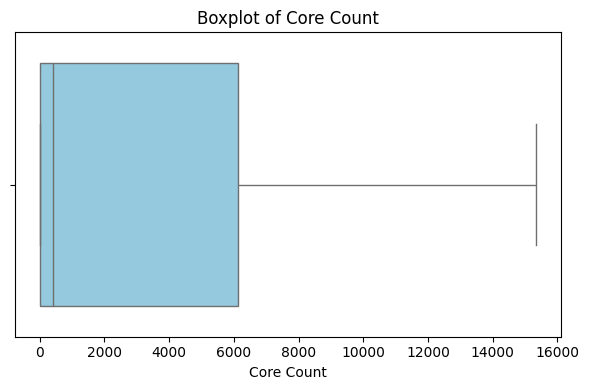

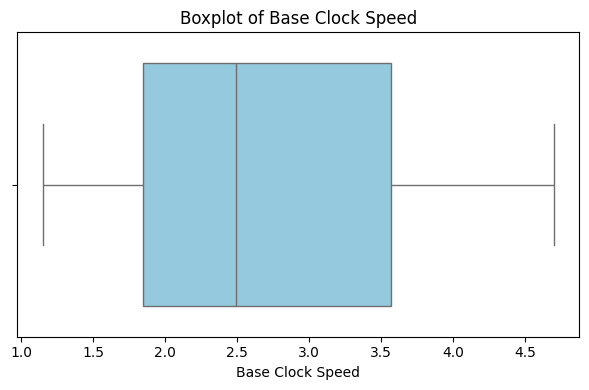

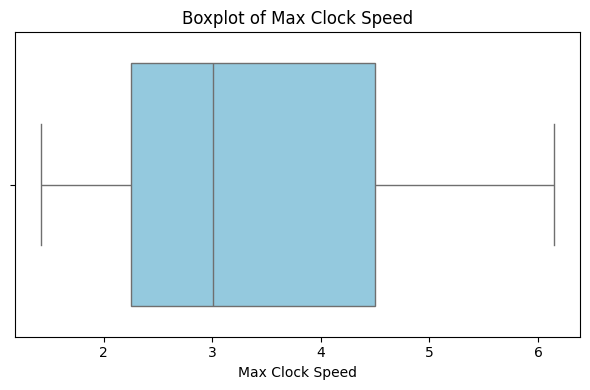

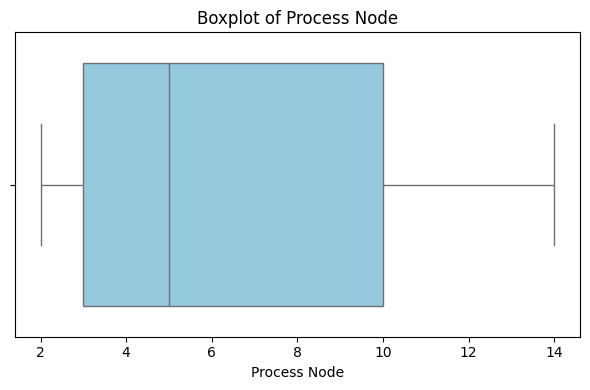

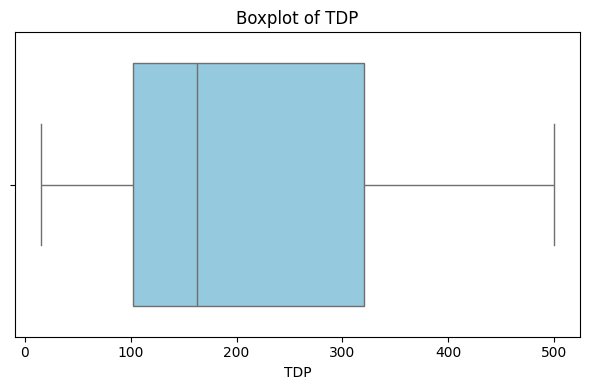

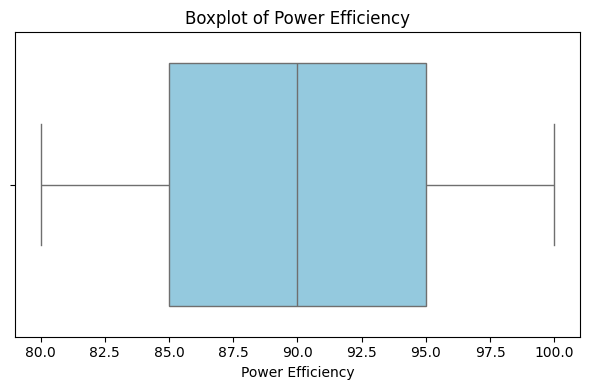

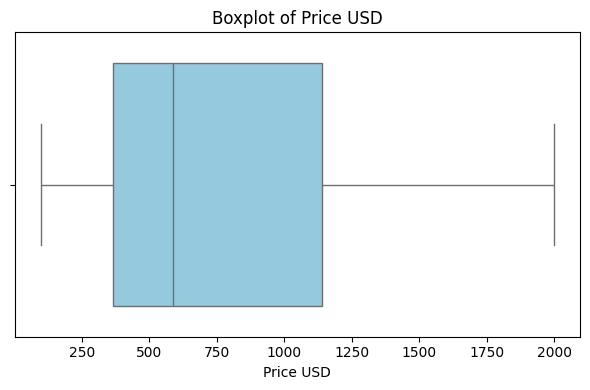

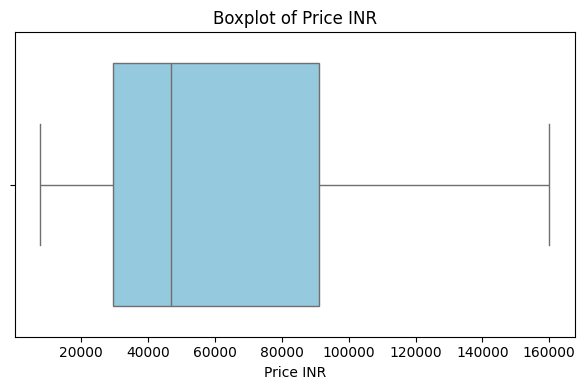

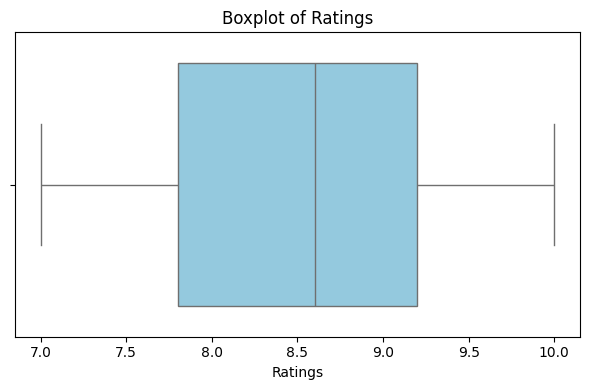

In [115]:
# Box-Plot for outliers
num_cols = df1.select_dtypes(include='number').columns
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df1[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

### **Step 10: Encoding**

In [116]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
categorical_cols = ['Name', 'Type', 'Manufacturer', 'Architecture', 'Memory', 'Release Date']
encoded_data = encoder.fit_transform(df[categorical_cols])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))
encoded_df.index = df.index
df = pd.concat([df, encoded_df], axis=1)
df = df.drop(categorical_cols, axis=1)
print(df.dtypes)

Core Count                 float64
Base Clock Speed           float64
Max Clock Speed            float64
Process Node                 int64
TDP                          int64
                            ...   
Release Date_12/31/2021    float64
Release Date_12/31/2022    float64
Release Date_12/31/2023    float64
Release Date_12/31/2024    float64
Release Date_12/31/2025    float64
Length: 7701, dtype: object


### **Step 11: Skewing**

In [117]:
df.skew()

,0
Core Count,1.326117
Base Clock Speed,0.333464
Max Clock Speed,0.299376
Process Node,0.736182
TDP,0.616988
...,...
Release Date_12/31/2021,42.794074
Release Date_12/31/2022,74.161985
Release Date_12/31/2023,42.794074
Release Date_12/31/2024,42.794074


### **Step 12: Data Visualization**

In [118]:
# Data Visualization
df = pd.read_csv('/content/CPU_GPU_DATASET (1).csv')
df['Release Date'] = pd.to_datetime(df['Release Date'], format='mixed', dayfirst=False)

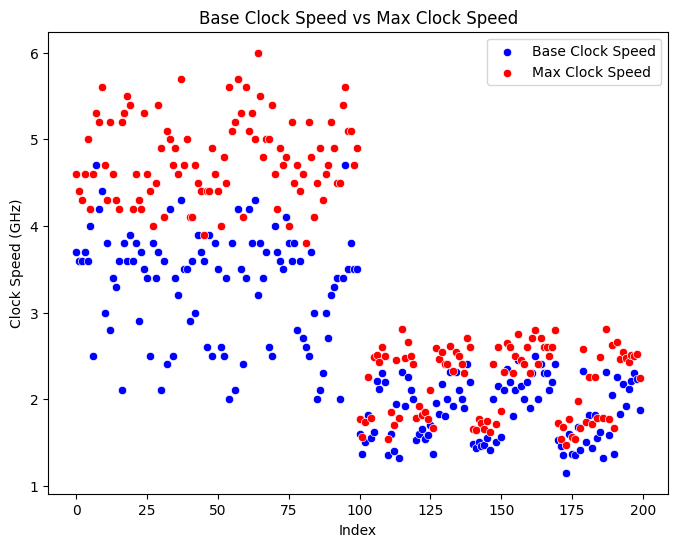

In [119]:
# Scatter-Plot
limited_df = df.head(200).reset_index()
plt.figure(figsize=(8, 6))
sns.scatterplot(data=limited_df, x='index', y='Base Clock Speed', color='blue', label='Base Clock Speed')
sns.scatterplot(data=limited_df, x='index', y='Max Clock Speed', color='red', label='Max Clock Speed')
plt.title('Base Clock Speed vs Max Clock Speed')
plt.xlabel('Index')
plt.ylabel('Clock Speed (GHz)')
plt.legend()
plt.show()

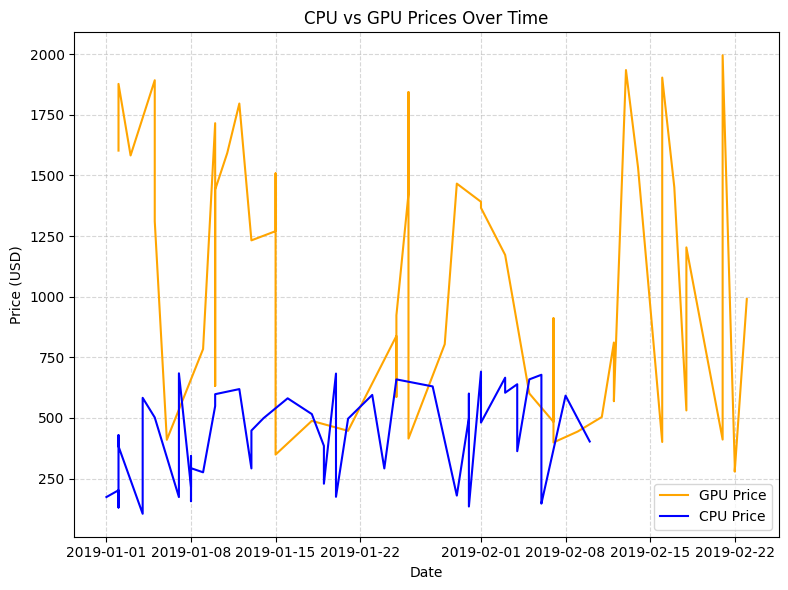

In [120]:
# Line-Chart
cpu = df[df['Type'] == 'CPU'].sort_values('Release Date').head(50)
gpu = df[df['Type'] == 'GPU'].sort_values('Release Date').head(50)
plt.figure(figsize=(8, 6))
plt.plot(gpu['Release Date'], gpu['Price USD'], label='GPU Price', color='orange')
plt.plot(cpu['Release Date'], cpu['Price USD'], label='CPU Price', color='blue')
plt.title('CPU vs GPU Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

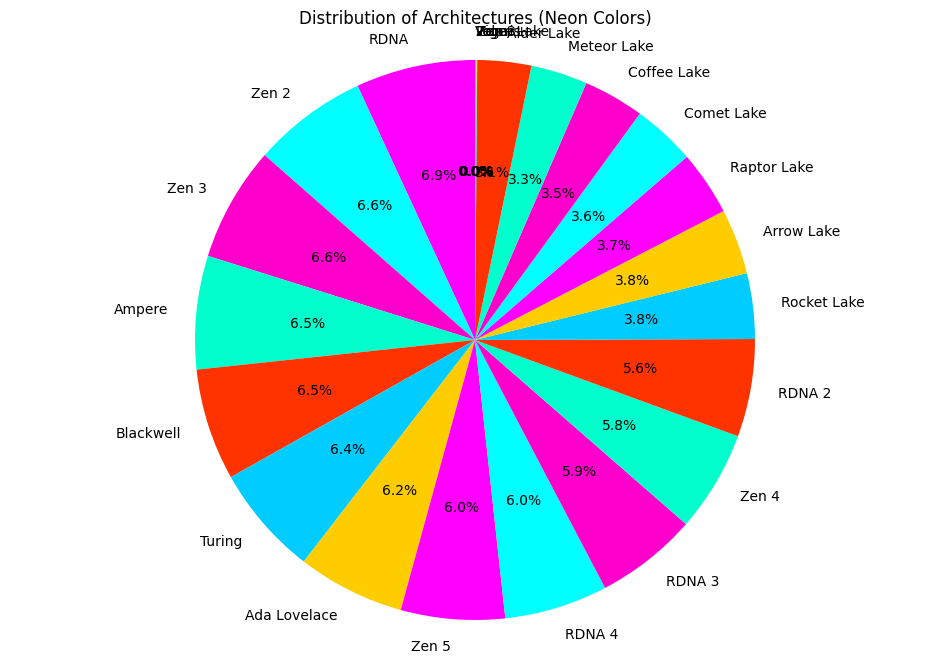

In [121]:
# Pie-Chart
arch_counts = df['Architecture'].value_counts()  # use df instead of df_clean
neon_colors = ['#ff00ff', '#00ffff', '#ff00cc', '#00ffcc', '#ff3300', '#00ccff', '#ffcc00']
plt.figure(figsize=(12, 8))
plt.pie(
    arch_counts.values,
    labels=arch_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=neon_colors[:len(arch_counts)]
)
plt.title('Distribution of Architectures (Neon Colors)')
plt.axis('equal')
plt.show()

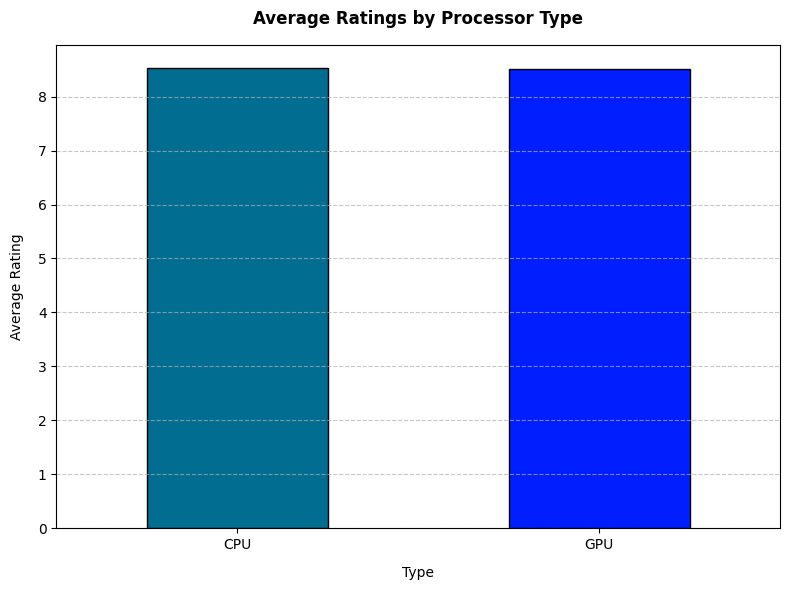

In [122]:
# Bar-Chart
avg_ratings = df.groupby('Type')['Ratings'].mean()
plt.figure(figsize=(8, 6))
avg_ratings.plot(kind='bar', color=['#006d91', '#001eff'], edgecolor='black')
plt.title('Average Ratings by Processor Type', pad=15, weight='bold')
plt.xlabel('Type', labelpad=10)
plt.ylabel('Average Rating', labelpad=10)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

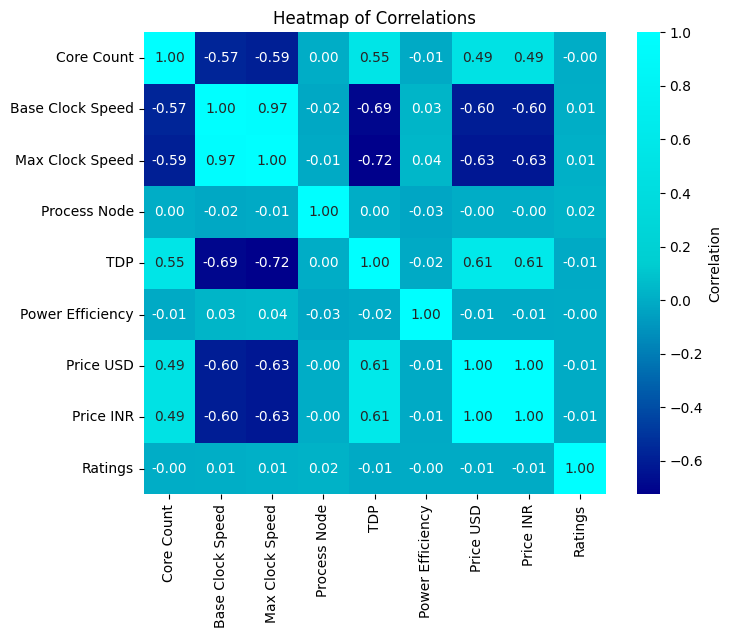

In [123]:
# HeatMap
numerical_df = df.select_dtypes(include=['int64', 'float64'])
colors = ['#00008B', '#00CED1', '#00FFFF']
cm = LinearSegmentedColormap.from_list('neon_blue', colors, N=256)
plt.figure(figsize=(8, 6))
sns.heatmap(numerical_df.corr(), annot=True, cmap=cm, fmt='.2f', square=True, cbar_kws={'label': 'Correlation'})
plt.title('Heatmap of Correlations')
plt.show()

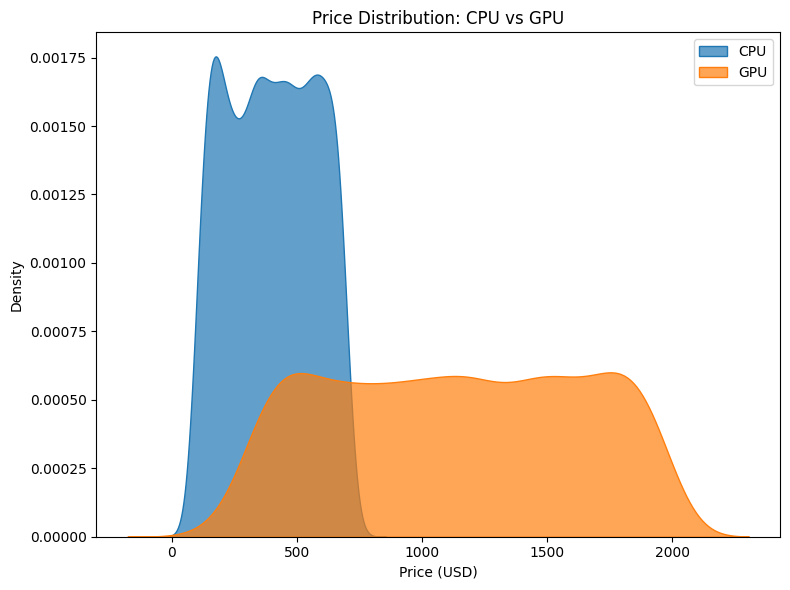

In [124]:
# KDE-Plot
df.rename(columns={' Type': 'Type'}, inplace=True)
plt.figure(figsize=(8, 6))
sns.kdeplot(df1[df1['Type'] == 'CPU']['Price USD'], label='CPU', fill=True, color='#1f77b4', alpha=0.7)
sns.kdeplot(df1[df1['Type'] == 'GPU']['Price USD'], label='GPU', fill=True, color='#ff7f0e', alpha=0.7)
plt.title('Price Distribution: CPU vs GPU')
plt.xlabel('Price (USD)')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()

<ipython-input-125-05e179ef5243>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Architecture', y='Base Clock Speed', data=df, palette='Set3')


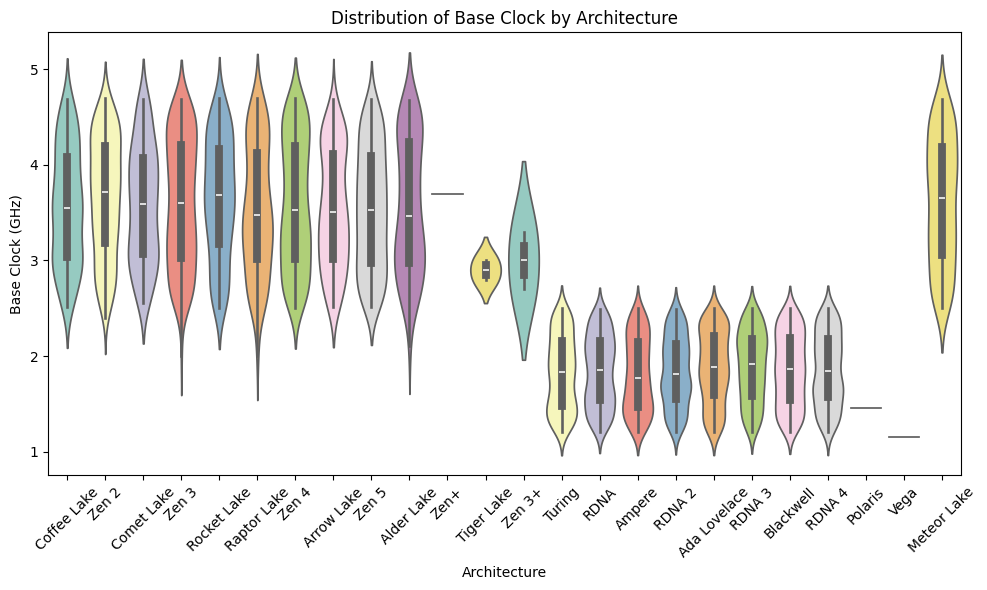

In [125]:
# violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Architecture', y='Base Clock Speed', data=df, palette='Set3')
plt.title('Distribution of Base Clock by Architecture')
plt.xlabel('Architecture')
plt.ylabel('Base Clock (GHz)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

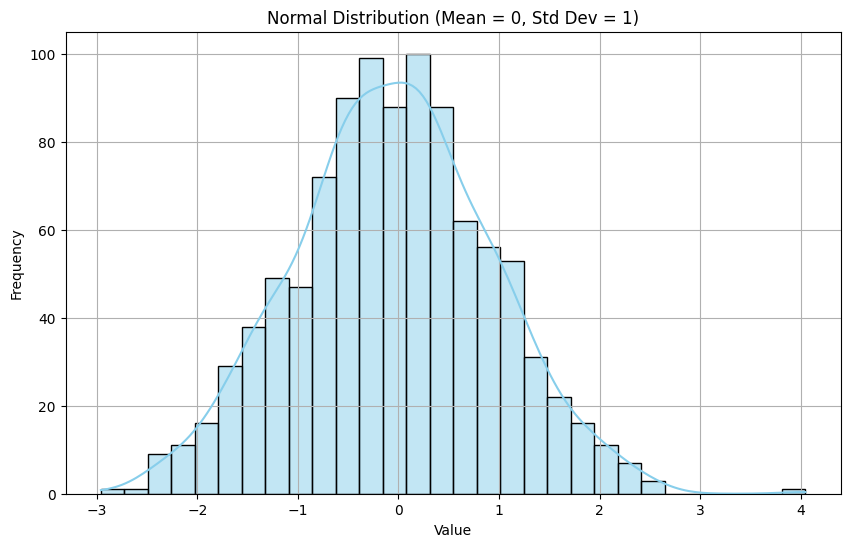

In [126]:
# Generate normal distribution data
data = np.random.normal(loc=0, scale=1, size=1000)
plt.figure(figsize=(10, 6))
sns.histplot(data, kde=True, bins=30, color='skyblue')
plt.title('Normal Distribution (Mean = 0, Std Dev = 1)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### **Step 13: Central Limit Theorem**

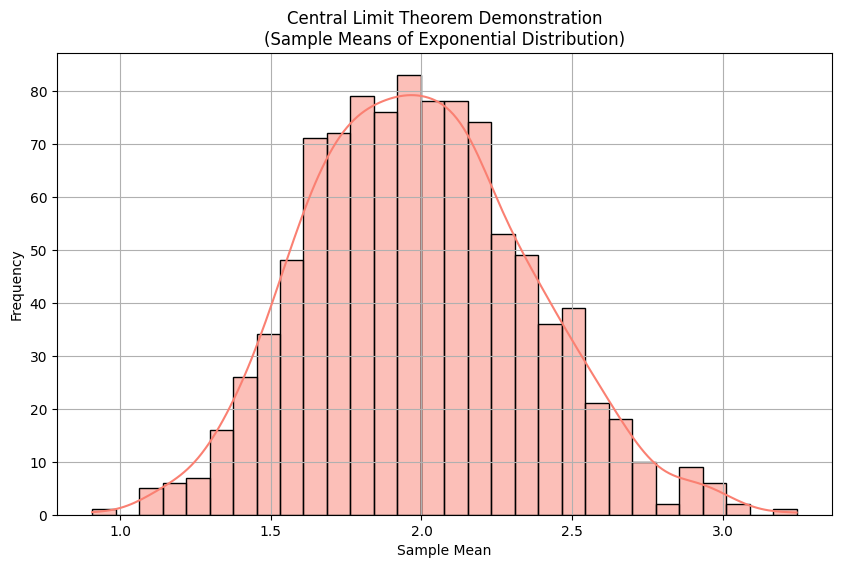

In [127]:
# Central Limit Theorem
np.random.seed(0)
sample_means = []
for _ in range(1000):
    sample = np.random.exponential(scale=2.0, size=30)
    sample_means.append(np.mean(sample))

# Plot the distribution of sample means
plt.figure(figsize=(10, 6))
sns.histplot(sample_means, kde=True, bins=30, color='salmon')
plt.title('Central Limit Theorem Demonstration\n(Sample Means of Exponential Distribution)')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### **Step 14: Feature Selection**

In [128]:
X = df.drop('Price INR', axis=1)
y = df['Price INR']
X_numeric = X.select_dtypes(include='number')
X_numeric = pd.DataFrame(SimpleImputer(strategy='mean').fit_transform(X_numeric),columns=X_numeric.columns)
y_cleaned = y.reset_index(drop=True)
selector = SelectKBest(score_func=f_classif, k=10)
selector.fit(X_numeric, y_cleaned)
selected_features = X_numeric.columns[selector.get_support()]
print("Top 10 Selected Features:")
for feature in selected_features:
    print("-", feature)

Top 10 Selected Features:
- Core Count
- Base Clock Speed
- Max Clock Speed
- Process Node
- TDP
- Power Efficiency
- Price USD
- Ratings


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=10 is greater than n_features=8. All the features will be returned.
  warnings.warn(


### **Step 15: Z-test calculation**

In [129]:
df = df.dropna(subset=['Base Clock Speed', 'Type'])
df['Base Clock Speed'] = df['Base Clock Speed'].astype(float)
a = df[df['Type'] == 'CPU']['Base Clock Speed']
b = df[df['Type'] == 'GPU']['Base Clock Speed']
z = (a.mean() - b.mean()) / np.sqrt(a.var()/len(a) + b.var()/len(b))
p = 2 * (1 - norm.cdf(abs(z)))
print("Z =", round(z, 2))
print("P-value =", round(p, 4))

Z = 122.95
P-value = 0.0


### **Step 16: SelectKBest Method**

In [130]:
X = df.select_dtypes(include='number')
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
selector = SelectKBest(score_func=f_classif, k=5)
X_selected = selector.fit_transform(X_imputed, y)
selected_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_indices]
print("Selected feature indices:", selected_indices)
print("Selected feature names:", list(selected_features))
print("Feature scores:", selector.scores_[selected_indices])

Selected feature indices: [1 2 4 6 7]
Selected feature names: ['Base Clock Speed', 'Max Clock Speed', 'TDP', 'Price USD', 'Price INR']
Feature scores: [3.04498091e+00 3.41168279e+00 3.74927649e+00 2.57706184e+04
            inf]


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


### **Step 17: Standard Scaler**

In [131]:
X = df.select_dtypes(include='number')
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)
print("Scaled data shape:", X_scaled.shape)

Scaled data shape: (5500, 9)


### **Step 18: Min-Max Scaler**

In [132]:
X = df.select_dtypes(include='number')
X_imputed = SimpleImputer(strategy='mean').fit_transform(X)
X_scaled = MinMaxScaler().fit_transform(X_imputed)
print("Min values:", X_scaled.min(axis=0))
print("Max values:", X_scaled.max(axis=0))

Min values: [0. 0. 0. 0. 0. 0. 0. 0. 0.]
Max values: [1. 1. 1. 1. 1. 1. 1. 1. 1.]


### **Step 19: Regression Algorithm**

In [133]:
df = df.dropna(subset=['Price USD'])
X = df.select_dtypes(include='number').drop(columns=['Price USD'])
y = df['Price USD']
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
print("Linear Regression R² Score:", r2_score(y_test, lr_pred))

# Decision Tree Regression
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
print("Decision Tree Regression R² Score:", r2_score(y_test, dt_pred))

# Random Forest Regression
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("Random Forest Regression R² Score:", r2_score(y_test, rf_pred))

# Support Vector Regression
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)
svr_pred = svr_model.predict(X_test)
print("SVR R² Score:", r2_score(y_test, svr_pred))

Linear Regression R² Score: 1.0
Decision Tree Regression R² Score: 0.9999973053113195
Random Forest Regression R² Score: 0.9999988408663387
SVR R² Score: 0.601909300693332


### **Step 20: Evaluation Metrics for Regression Model**

In [134]:
# Evaluation Metrics for Regression Model
y_pred = lr_pred
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("R² Score:", r2)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

R² Score: 1.0
Mean Absolute Error (MAE): 1.6196240308504043e-12
Mean Squared Error (MSE): 4.547213922467287e-24
Root Mean Squared Error (RMSE): 2.132419734120674e-12


# **SUBMITTED BY:**
####**RAHUL ANAND T**
####**DEPARTMENT OF ARTIFICIAL INTELLIGENCE AND DATA SCIENCE**
####**3RD-YEAR (6th-SEMESTER)**